<a href="https://colab.research.google.com/github/LBQTrung/Python-exercise/blob/main/Chuong7_Kiem_dinh_gia_thuyet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kiểm định giả thuyết về phân phối của biến ngẫu nhiên

Import các thư viện cần thiết:

In [1]:
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

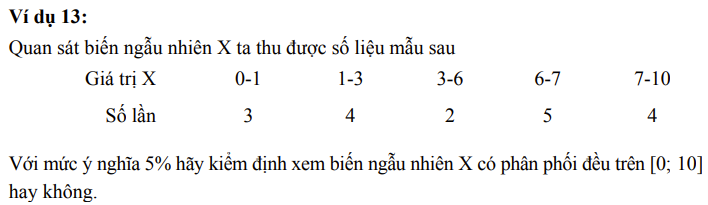

Kiểm định giả thuyết:
$$H_0: \text{X có phân phối đều trên [0, 10]}$$
$$H_a: \text{X không có phân phối đều trên [0, 10]}$$

In [2]:
def uniform_test(data, alpha):
  n = []
  s = []
  p = []
  e = []
  # Thêm các khoảng, tần số thực nghiệm vào list:
  for i in data.keys():
    n.append(data[i])
    s.append(i)
  k = len(s)
  # Tính các xác suất tương ứng
  for i in range(k):
    temp = (s[i][1] - s[i][0]) / (s[k-1][1] - s[0][0])
    p.append(temp)
  # Tính các tần số lí thuyết
  for i in range(k):
    e.append(sum(n) * p[i])

  test_statistic = 0
  for i in range(k):
    test_statistic += (n[i] - e[i]) ** 2 / e[i]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = k - 1) # Đã được giải thích ở hình vẽ bên dưới
  if test_statistic > chi2_stat:
    print("Ta có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Ta không có bằng chứng để bác bỏ giả thuyết H0")

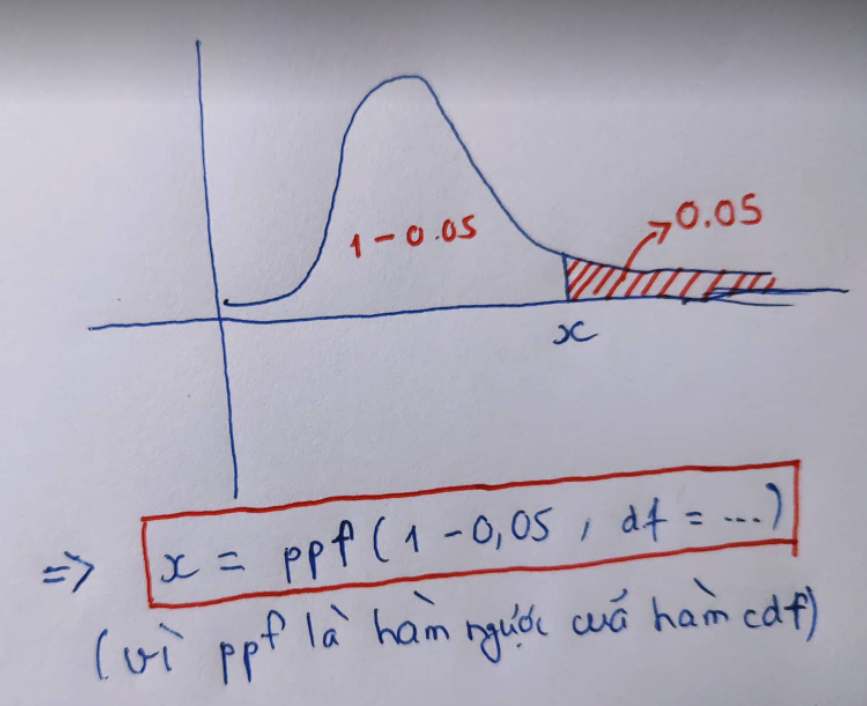

In [3]:
data = {
    (0,1): 3,
    (1,3): 4,
    (3,6): 2,
    (6,7): 5,
    (7,10): 4
}

In [4]:
uniform_test(data, 0.05)

Ta không có bằng chứng để bác bỏ giả thuyết H0


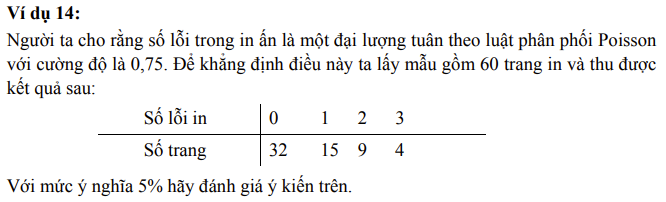

Kiểm định giả thuyết:
$$H_0: \text{X có phân phối Poisson với tham số 0.75}$$
$$H_a: \text{X không có phân phối Poisson với tham số 0.75}$$

In [6]:
def poisson_test(data, lma, alpha):
  n = []
  s = []
  p = []
  e = []
  for i in data.keys():
    s.append(i)
    n.append(data[i])
  k = len(s)
  for i in range(k-1):
    p.append(math.exp(-lma) * (lma ** s[i]) /  math.factorial(s[i]))
  else:
    p.append(1 - sum(p))
  for i in range(k):
    e.append(sum(n) * p[i])
  test_statistic = 0
  for i in range(k):
    test_statistic += (n[i] - e[i]) ** 2 / e[i]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = k - 1)
  if test_statistic > chi2_stat:
    print("Ta có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Ta không có bằng chứng để bác bỏ giả thuyết H0")  

In [7]:
data = {
    0: 32,
    1: 15,
    2: 9,
    3: 4
}

In [8]:
poisson_test(data, 0.75, 0.05)

Ta không có bằng chứng để bác bỏ giả thuyết H0


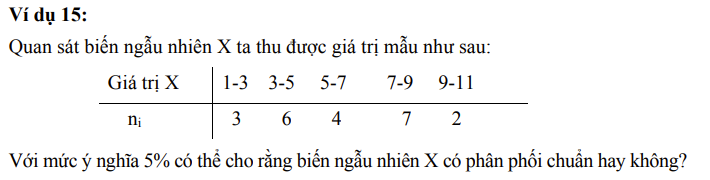

Kiểm định giả thuyết:
$$H_0: X \sim N(\mu, \sigma^2)$$
$$H_a: X \nsim N(\mu, \sigma^2)$$

In [11]:
def norm_test(data, alpha = 0.05):
  temp = []
  n = []
  s = []
  p = [0]
  e = []
  # Tổ chức lại tập dữ liệu
  for i in data.keys():
    n.append(data[i])
    s.append(i)
    for j in range(data[i]):
      temp.append((i[1] + i[0])/2)
  data = temp
  # Tính các tham số thông qua mẫu
  mean = np.mean(data)
  std = np.std(data, ddof = 1)
  k = len(n)
  for i in range(k-1):
    temp = stats.norm.cdf(s[i][1], loc = mean, scale = std) - p[i]
    p.append(temp)
  else:
    temp = 1 - stats.norm.cdf(s[i][1], loc = mean, scale = std)
    p.append(temp)
  p.pop(0)
  
  for i in range(k):
    temp = sum(n) * p[i]
    e.append(temp)
  test_statistic = 0
  
  for i in range(k):
    test_statistic += (n[i] - e[i]) ** 2 / e[i]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = k - 1)
  if test_statistic > chi2_stat:
    print("Ta có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Ta không có bằng chứng để bác bỏ giả thuyết H0") 

In [14]:
# Xây dựng dữ liệu
data = {
    (1,3): 3,
    (3, 5): 6,
    (5, 7): 4,
    (7, 9): 7,
    (9, 11): 2
}

In [15]:
norm_test(data)

Ta không có bằng chứng để bác bỏ giả thuyết H0


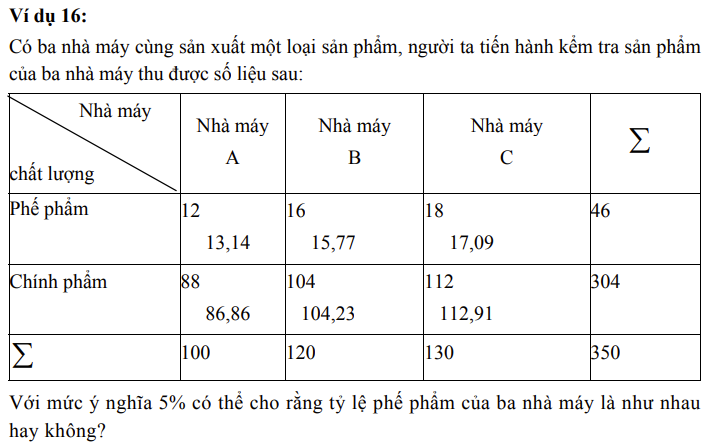

Gọi $p_1,p_2,p_3$ là tỷ lệ phế phẩm của ba nhà máy A, B và C. Ta tiến hành kiểm định giả thuyết:
$$H_0: p_1 = p_2 = p_3$$
$$H_a: \exists p_i \neq p_j, i\neq j$$

In [60]:
# xây dựng hàm kiểm định tỷ lệ và kiểm định tính độc lập
def proportion_or_independence_test(data, alpha = 0.05):
  for i in range(len(data)):
    temp = sum(data[i])
    data[i].append(temp)
  temp = []
  for j in range(len(data[0])):
    s = sum([data[i][j] for i in range(len(data))])
    temp.append(s)
  data.append(temp)

  e = []
  for i in range(len(data) - 1):
    row = []
    for j in range(len(data[0]) - 1):
      temp = data[i][len(data[0])-1] * data[len(data)-1][j] \
      / data[len(data)-1][len(data[0])-1]
      row.append(temp)
    e.append(row)

  test_statistic = 0
  r = len(e)
  s = len(e[0])
  for i in range(r):
    for j in range(s):
      test_statistic += (data[i][j] - e[i][j]) ** 2 / e[i][j]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = (r-1) * (s-1))
  if test_statistic > chi2_stat:
    print("Ta có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Ta không có bằng chứng để bác bỏ giả thuyết H0")  

In [61]:
data = [
    [12, 88],
    [16, 104],
    [18, 112],
]

In [62]:
proportion_or_independence_test(data)

Ta không có bằng chứng để bác bỏ giả thuyết H0


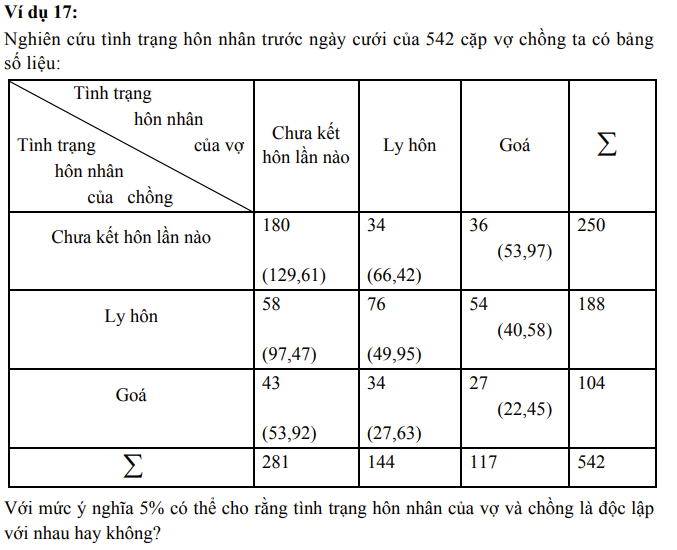

In [63]:
data = [
    [180, 58, 43],
    [34, 76, 34],
    [36, 54, 27]
]

In [64]:
proportion_or_independence_test(data)

Ta có bằng chứng để bác bỏ giả thuyết H0
